__Your name here__
<br>
Date: Feb. 8, 2023
<br>
PHYS 2030 W23

__Rubric__ (100 points total):

- Part (a) /__60 points__
     
- Part (b) /__40 points__

# <center><font color=#46769B>Exercise 13: Rotation curves</font></center>

## <font color=#46769B>Introduction</font>

DDO154 is a nearby dwarf galaxy, shown below. In this exercise, we will consider astronomical data for DDO154 and show that it is mostly made up of dark matter, which cannot be seen directly but is inferred through its gravitational pull on the visible stars and gas that can be seen.

Here is a picture of DDO154:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/ddo154_color.jpg" width="300">
    <center><i>Figure credit: National Radio Astronomy Observatory</i></center>
</div>

Now, total mass of stars and gas in DDO154 is around $3 \times 10^8 \; M_\odot$ (note we measure mass in units of solar masses, where $1 \; M_\odot \approx 2 \times 10^{30} \; {\rm kg}$). This is the *luminous* mass, stuff made up of normal atoms, which can be seen directly in telescopes.

Here we will use radio-wave observations of DDO154 from [The HI Near Galaxy Survey (THINGS)](https://www2.mpia-hd.mpg.de/THINGS/Overview.html) to determine the *total mass* of the galaxy, including the atoms and anything that *cannot* be seen directly. Let's describe the physics and the observations.

The total mass of the galaxy is measured by looking at how stars and gas move in circular motion due to the force of gravity.
The gravitational force is the centripetal force that holds them in a circular orbit.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/rotation.png" width="400">
    <center><i>Figure credit (background): European Southern Observatory</i></center>
</div>

Suppose we have a star of mass $m_\star$, located at a radius $r$, moving with circular velocity $v$.
Its centripetal force is $F_{\rm cent} = \frac{m_\star v^2}{r}$. 
Its gravitational force is $F_{\rm grav} = \frac{G m_\star M}{r^2}$, where $G$ is Newton's gravitational constant and $M$ is the mass that exerts a gravitational pull on the star.
Setting the centripetal force equal to the gravitational force, we have the following relation for $v$:

$$v(r) = \sqrt{\frac{G M(r)}{r}} \, . \qquad (1)$$

Now, the mass $M(r)$ that appears here is the mass *within* the stars orbit radius $r$. [Newton proved that](https://en.wikipedia.org/wiki/Shell_theorem) a traveler approaching the center of the Earth will feel less and less the effect of gravity until they become weightless at the center.
Similarly, if the distribution of mass is spherically symmetric in a galaxy, a star at larger radius will feel the gravitational pull from more of the mass compared to a star at a smaller radius.
For a star at radius $r$, it feels the pull of all mass interior to $r$ (i.e., within a sphere of radius $r$).

Telescopes have measured the radio waves from the galaxy's hydrogen gas, which is emitted at a characteristic wavelength of $\lambda = 21$ cm in hyperfine transitions. 
The circular velocity is inferred by how the radio waves are redshifted or blueshifted away from this wavelength due to the relativistic Doppler effect.

By __fitting a model to the data__, we will show that the galaxy is mostly made up of dark matter. Namely, we will hopefully show that the total mass $M_{\rm tot}$ is much larger than the $3 \times 10^8 \; {\rm M_\odot}$ of luminous matter that can be observed directly.
That is evidence for an extra form of matter, dark matter, that cannot be seen! Though it cannot be seen directly, its presence is seen *indirectly* through the gravitational pull it exerts on the luminous matter.

Our goals for this notebook are:
- Use importance sampling to fit parameters from data.
- Gain experience with __inverse problems__

Required reading:
- *Lesson 5: Multivariate distributions*

The cell below gives the data you will be using, and makes an error bar plot.

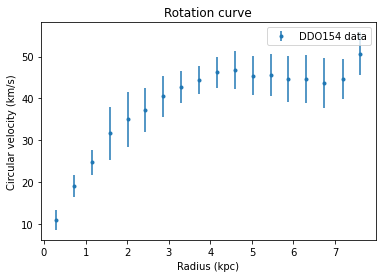

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Newton's constant
G = 4.302e-6

# Data

# radius (kpc) 
radius = np.array([0.29, 0.72, 1.15, 1.58, 2.01, 2.44, 2.87, 3.3 , 3.73, 4.16, 4.59,
                          5.02, 5.45, 5.88, 6.31, 6.74, 7.18, 7.61])

# mean circular velocity v (km/s) 
mu = np.array([10.98, 19.01, 24.68, 31.67, 35.06, 37.32, 40.48, 42.8 , 44.44,
               46.22, 46.73, 45.47, 45.65, 44.63, 44.7 , 43.69, 44.67, 50.72])

# error for circular velocity v (km/s) 
sigma = np.array([2.43, 2.62, 2.97, 6.34, 6.57, 5.24, 4.81, 3.78, 3.37, 3.65, 4.55,
                  4.68, 5.02, 5.49, 5.74, 5.95, 4.76, 5.12])
              
plt.errorbar(radius,mu,yerr=sigma,fmt='.',label='DDO154 data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular velocity (km/s)')
plt.title('Rotation curve')

plt.legend()
plt.show()

## <font color=#46769B>Part (a)</font>

Consider the following function for the enclosed mass

$$M(r) = \frac{M_{\rm tot} r^3}{(r + a)^3} \, .$$

The mass is not a point mass at the center, but it spread throughout the galaxy. A star moving at larger radius $r$ will enclose a larger mass $M(r)$ within its orbit.

From Eq. (1), the circular velocity function is therefore

$$v(r) = \sqrt{ \frac{G M_{\rm tot} r^2}{(r + a)^3 } } \, . \qquad (2)$$

Now, this is a function of $r$, and it also has two unknown parameters:
- $M_{\rm tot}$ is the total mass, this is the parameter of interest, giving the total mass of the galaxy.
- $a$ is a characteristic radius, and we will consider this as a nuisance parameter.

These are the parameters you will have to sample in order to find the best values that fit the data.

A brief word on units. We will measure mass in $M_\odot$, distance (radius $r$) in units of kiloparsecs ($1 \; {\rm kpc} \approx 3000$ light-years is a useful scale for measuring galaxies), and velocity in more familiar ${\rm km/s}$. In these units, it is convenient to write Newton's constant as

$$G = 4.3 \times 10^{-6} \; {\rm km^2/s^2 \, M_\odot^{-1} \, kpc} \; .$$

You tasks are as follows. First, define a $\chi^2(M_{\rm tot},a)$ that takes as input our two unknown parameters and returns the following:

$$\chi^2(M_{\rm tot},a) = \sum_{k=1}^n \frac{(v(M_{\rm tot},a) - \mu_k)^2}{\sigma_k^2}$$

where the $\mu_k$ and $\sigma_k$ are the circular velocity central values `mu` and errors `sigma` corresponding to the data (given above).
Then, define your (unnormalized) PDF

$$P(M_{\rm tot},a) = e^{-\tfrac{1}{2} \chi^2(M_{\rm tot},a)} \, .$$

Next, perform the following tasks:
- Define a proposal distribution distribution
$$Q(M_{\rm tot},a) = Q_M(M_{\rm tot}) Q_a(a)$$
where $Q_M$ is a normal distribution centered at $\mu_M$ with width $\sigma_M$ and $Q_a$ is a normal distribution centered at $\mu_a$ with width $\sigma_a$.
- Choosing $\mu_M$, $\sigma_M$, $\mu_a$, $\sigma_a$ as you like, generate $N = 10^6$ samples for $M_{\rm tot}$ and $a$.
- Calculate the weights $w = P(M_{\rm tot},a)/Q(M_{\rm tot},a)$. Then normalize your weights since you target distribution was not normalized.
- Plot a weighted 2D histogram for $a$ on the $x$-axis and $M_{\rm tot}$ on the $y$ axis. Label your axes, and choose a suitable number of bins.

You will probably need to revise your proposal distribution a few times (by changing $\mu_M$, $\sigma_M$, $\mu_a$, $\sigma_a$) until you get good results.



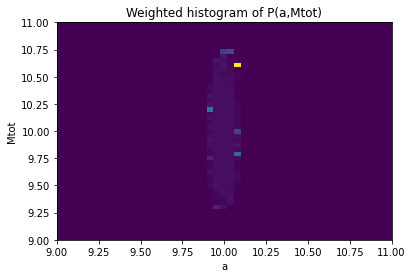

In [30]:
mu_M = 10 # e8
sigma_M = 0.15

mu_a = 10
sigma_a = 0.02

def Q(Mtot,a):
  return (1/np.sqrt(2 * np.pi * sigma_M**2) * np.exp(-0.5*(Mtot-mu_M)**2/sigma_M**2)) * (1/np.sqrt(2 * np.pi * sigma_a**2) * np.exp(-0.5*(a-mu_a)**2/sigma_a**2))

num = 10**6
Mtot = np.random.normal(mu_M,sigma_M,num)
a = np.random.normal(mu_a,sigma_a,num)

def chisq(Mtot,a):
  return np.sum( (np.sqrt((G * (Mtot) * radius**2) / (radius+a)**3 ) - mu)**2 / sigma**2 )

def P(Mtot,a):
  return np.exp(-0.5 * chisq(Mtot,a))

def QM(Mtot):
  return 1/np.sqrt(2 * np.pi * sigma_M**2) * np.exp(-0.5*(Mtot-mu_M)**2/sigma_M**2)

def Qa(a):
  return 1/np.sqrt(2 * np.pi * sigma_a**2) * np.exp(-0.5*(a-mu_a)**2/sigma_a**2)

Pvec = np.vectorize(P)

w = Pvec(Mtot,a)/(QM(Mtot)*Qa(a))
w = w/np.mean(w)

bins = [np.linspace(9,11), np.linspace(9,11)]

plt.hist2d(a,Mtot,bins=bins,weights=w)
plt.title('Weighted histogram of P(a,Mtot)')
plt.xlabel('a')
plt.ylabel('Mtot')
plt.show()

## <font color=#46769B>Part (b)</font>

Perform the following tasks:
- Plot a weighted histogram for $M_{\rm tot}$ to show the marginalized distribution for $M_{\rm tot}$.
- Calculate the (weighted) mean $\langle M_{\rm tot} \rangle$ and standard error on the mean $E_{M_{\rm tot}}$.
- Add a comment on how your value of $M_{\rm tot}$ compares to the mass of luminous matted quoted above.
- Plot the rotation curve data again (the `errorbar` plot above) and add to it a plot of your $v(r)$ vs $r$, where $v(r)$ is given in Eq. (2) and use your mean values of $M_{\rm tot}$ and $a$. Label your curve in the legend. (It should agree reasonably well by eye with the data.)

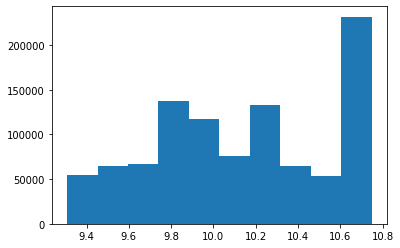

Weighted mean value and standard error for Mtot is 10.126775054239394 and 0.409978220284258


In [34]:
plt.hist(Mtot, weights=w)

plt.show()

mean_Mtot = np.mean(Mtot*w)
std = np.sqrt( np.mean(w*Mtot**2) - np.mean(w*Mtot)**2 )

print('Weighted mean value and standard error for Mtot is', mean_Mtot, 'and', std)

[0.         0.08080808 0.16161616 0.24242424 0.32323232 0.4040404
 0.48484848 0.56565657 0.64646465 0.72727273 0.80808081 0.88888889
 0.96969697 1.05050505 1.13131313 1.21212121 1.29292929 1.37373737
 1.45454545 1.53535354 1.61616162 1.6969697  1.77777778 1.85858586
 1.93939394 2.02020202 2.1010101  2.18181818 2.26262626 2.34343434
 2.42424242 2.50505051 2.58585859 2.66666667 2.74747475 2.82828283
 2.90909091 2.98989899 3.07070707 3.15151515 3.23232323 3.31313131
 3.39393939 3.47474747 3.55555556 3.63636364 3.71717172 3.7979798
 3.87878788 3.95959596 4.04040404 4.12121212 4.2020202  4.28282828
 4.36363636 4.44444444 4.52525253 4.60606061 4.68686869 4.76767677
 4.84848485 4.92929293 5.01010101 5.09090909 5.17171717 5.25252525
 5.33333333 5.41414141 5.49494949 5.57575758 5.65656566 5.73737374
 5.81818182 5.8989899  5.97979798 6.06060606 6.14141414 6.22222222
 6.3030303  6.38383838 6.46464646 6.54545455 6.62626263 6.70707071
 6.78787879 6.86868687 6.94949495 7.03030303 7.11111111 7.191919

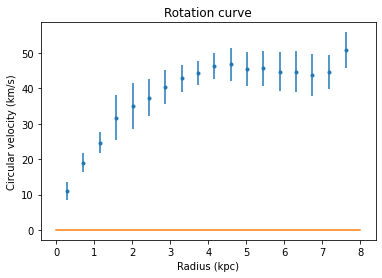

In [46]:
plt.errorbar(radius,mu,yerr=sigma,fmt='.',label='DDO154 data')
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular velocity (km/s)')
plt.title('Rotation curve')
mean_a = np.mean(a*w)
r = np.linspace(0,8,num=100)
y = np.sqrt((G * (mean_Mtot) * r**2) / (r+mean_a)**3 )
print(r)
plt.plot(r, y, label='v(r)')
plt.show()